<a href="https://colab.research.google.com/github/alcarvalhox/analise_de_oleo/blob/main/Analise_Oleo_deploy_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Carrega Bibliotecas**

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import pickle
from keras.models import load_model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier

## Carrega arquivo a ser testado

In [ ]:
bd_teste = pd.read_excel("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/bd_teste.xlsx")
bd_teste.to_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/bd_teste.csv")

KeyboardInterrupt: ignored

In [ ]:
bd_teste = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/bd_teste.csv",sep = ',',encoding = 'utf8')

In [ ]:
bd_teste.shape

(21463, 21)

## Trata o arquivo teste carregado

In [ ]:
bd_teste['DIESEL'] = bd_teste['DIESEL'].apply({'N':0, 'S':1,'NN':0,'< 1':0,'<1':0,'> 10':1,'>10':1}.get)

In [ ]:
bd_teste['DIESEL'] = bd_teste['DIESEL'].replace(r'^\s+$', np.nan, regex=True)

In [ ]:
bd_teste = bd_teste.fillna({'DIESEL': 0})

In [ ]:
cont=0
for x in range (bd_teste.shape[0]):
  if bd_teste['TBN'][x]=='-':
    bd_teste['TBN'][x]= 0
    cont=cont+1

print(cont) 

0


In [ ]:
bd_teste['TBN']=bd_teste['TBN'].astype(str).str.replace("," , ".").astype(float)

In [ ]:
media = bd_teste['TBN'].mean()
bd_teste = bd_teste.fillna({'TBN': media})

In [ ]:
cont=0
for x in range (bd_teste.shape[0]):
  if bd_teste['VISCOSIDADE'][x]=='-':
    bd_teste['VISCOSIDADE'][x]= 0
    cont=cont+1

print(cont)

0


In [ ]:
bd_teste['VISCOSIDADE']=bd_teste['VISCOSIDADE'].astype(str).str.replace("," , ".").astype(float)

In [ ]:
media = bd_teste['VISCOSIDADE'].mean()
bd_teste = bd_teste.fillna({'VISCOSIDADE': media})

In [ ]:
cont1=0;cont2=0;cont3=0;cont4=0;cont5=0;cont6=0;cont7=0;cont8=0;cont9=0;cont10=0;cont11=0;cont12=0;cont13=0;cont14=0
for x in range (bd_teste.shape[0]):
  if bd_teste['ALUMINIO'][x]=='-':
    bd_teste['ALUMINIO'][x]= 0
    cont1=cont1+1
  if bd_teste['FERRO'][x]=='-':
    bd_teste['FERRO'][x]= 0
    cont2=cont2+1  
  if bd_teste['CROMO'][x]=='-':
    bd_teste['CROMO'][x]= 0
    cont3=cont3+1
  if bd_teste['CHUMBO'][x]=='-':
    bd_teste['CHUMBO'][x]= 0
    cont4=cont4+1
  if bd_teste['COBRE'][x]=='-':
    bd_teste['COBRE'][x]= 0
    cont5=cont5+1
  if bd_teste['ESTANHO'][x]=='-':
    bd_teste['ESTANHO'][x]= 0
    cont6=cont6+1
  if bd_teste['NIQUEL'][x]=='-':
    bd_teste['NIQUEL'][x]= 0
    cont7=cont7+1
  if bd_teste['PRATA'][x]=='-':
    bd_teste['PRATA'][x]= 0
    cont8=cont8+1  
  if bd_teste['SILICIO'][x]=='-':
    bd_teste['SILICIO'][x]= 0
    cont9=cont9+1
  if bd_teste['SODIO'][x]=='-':
    bd_teste['SODIO'][x]= 0
    cont10=cont10+1
  if bd_teste['AGUA'][x]=='-':
    bd_teste['AGUA'][x]= 0
    cont11=cont11+1
  if bd_teste['FULIGEM'][x]=='-':
    bd_teste['FULIGEM'][x]= 0
    cont12=cont12+1
  if bd_teste['OXIDACAO'][x]=='-':
    bd_teste['OXIDACAO'][x]= 0
    cont13=cont13+1
  if bd_teste['SULFATACAO'][x]=='-':
    bd_teste['SULFATACAO'][x]= 0
    cont14=cont14+1                      

print(cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14)

0 0 0 0 0 0 0 0 0 0 0 0 0 0


In [ ]:
bd_teste['ALUMINIO'] = bd_teste['ALUMINIO'].replace(r'^\s+$', np.nan, regex=True)
bd_teste['FERRO'] = bd_teste['FERRO'].replace(r'^\s+$', np.nan, regex=True)
bd_teste['CROMO'] = bd_teste['CROMO'].replace(r'^\s+$', np.nan, regex=True)
bd_teste['CHUMBO'] = bd_teste['CHUMBO'].replace(r'^\s+$', np.nan, regex=True)
bd_teste['COBRE'] = bd_teste['COBRE'].replace(r'^\s+$', np.nan, regex=True)
bd_teste['ESTANHO'] = bd_teste['ESTANHO'].replace(r'^\s+$', np.nan, regex=True)
bd_teste['NIQUEL'] = bd_teste['NIQUEL'].replace(r'^\s+$', np.nan, regex=True)
bd_teste['PRATA'] = bd_teste['PRATA'].replace(r'^\s+$', np.nan, regex=True)
bd_teste['SILICIO'] = bd_teste['SILICIO'].replace(r'^\s+$', np.nan, regex=True)
bd_teste['SODIO'] = bd_teste['SODIO'].replace(r'^\s+$', np.nan, regex=True)
bd_teste['AGUA'] = bd_teste['AGUA'].replace(r'^\s+$', np.nan, regex=True)
bd_teste['FULIGEM'] = bd_teste['FULIGEM'].replace(r'^\s+$', np.nan, regex=True)
bd_teste['OXIDACAO'] = bd_teste['OXIDACAO'].replace(r'^\s+$', np.nan, regex=True)
bd_teste['SULFATACAO'] = bd_teste['SULFATACAO'].replace(r'^\s+$', np.nan, regex=True)

In [ ]:
bd_teste['ALUMINIO']=bd_teste['ALUMINIO'].astype(str).str.replace("," , ".").astype(float)
bd_teste['FERRO']=bd_teste['FERRO'].astype(str).str.replace("," , ".").astype(float)
bd_teste['CROMO']=bd_teste['CROMO'].astype(str).str.replace("," , ".").astype(float)
bd_teste['CHUMBO']=bd_teste['CHUMBO'].astype(str).str.replace("," , ".").astype(float)
bd_teste['COBRE']=bd_teste['COBRE'].astype(str).str.replace("," , ".").astype(float)
bd_teste['ESTANHO']=bd_teste['ESTANHO'].astype(str).str.replace("," , ".").astype(float)
bd_teste['NIQUEL']=bd_teste['NIQUEL'].astype(str).str.replace("," , ".").astype(float)
bd_teste['PRATA']=bd_teste['PRATA'].astype(str).str.replace("," , ".").astype(float)
bd_teste['SILICIO']=bd_teste['SILICIO'].astype(str).str.replace("," , ".").astype(float)
bd_teste['SODIO']=bd_teste['SODIO'].astype(str).str.replace("," , ".").astype(float)
bd_teste['AGUA']=bd_teste['AGUA'].astype(str).str.replace("," , ".").astype(float)
bd_teste['FULIGEM']=bd_teste['FULIGEM'].astype(str).str.replace("," , ".").astype(float)
bd_teste['OXIDACAO']=bd_teste['OXIDACAO'].astype(str).str.replace("," , ".").astype(float)
bd_teste['SULFATACAO']=bd_teste['SULFATACAO'].astype(str).str.replace("," , ".").astype(float)

In [ ]:
media = bd_teste['ALUMINIO'].mean()
bd_teste = bd_teste.fillna({'ALUMINIO': media})
media = bd_teste['FERRO'].mean()
bd_teste = bd_teste.fillna({'FERRO': media})
media = bd_teste['CROMO'].mean()
bd_teste = bd_teste.fillna({'CROMO': media})
media = bd_teste['CHUMBO'].mean()
bd_teste = bd_teste.fillna({'CHUMBO': media})
media = bd_teste['COBRE'].mean()
bd_teste = bd_teste.fillna({'COBRE': media})
media = bd_teste['ESTANHO'].mean()
bd_teste = bd_teste.fillna({'ESTANHO': media})
media = bd_teste['NIQUEL'].mean()
bd_teste = bd_teste.fillna({'NIQUEL': media})
media = bd_teste['PRATA'].mean()
bd_teste = bd_teste.fillna({'PRATA': media})
media = bd_teste['SILICIO'].mean()
bd_teste = bd_teste.fillna({'SILICIO': media})
media = bd_teste['SODIO'].mean()
bd_teste = bd_teste.fillna({'SODIO': media})
media = bd_teste['AGUA'].mean()
bd_teste = bd_teste.fillna({'AGUA': media})
media = bd_teste['FULIGEM'].mean()
bd_teste = bd_teste.fillna({'FULIGEM': media})
media = bd_teste['OXIDACAO'].mean()
bd_teste = bd_teste.fillna({'OXIDACAO': media})
media = bd_teste['SULFATACAO'].mean()
bd_teste = bd_teste.fillna({'SULFATACAO': media})

In [ ]:
bd_teste.isnull().sum()

NU_ANLS_OLEO    0
LOCO_analise    0
DT_COLETA       0
ALUMINIO        0
FERRO           0
CROMO           0
CHUMBO          0
COBRE           0
ESTANHO         0
NIQUEL          0
PRATA           0
SILICIO         0
SODIO           0
DIESEL          0
VISCOSIDADE     0
AGUA            0
TBN             0
FULIGEM         0
OXIDACAO        0
SULFATACAO      0
TARGET          0
dtype: int64

In [ ]:
del bd_teste['TARGET']

In [ ]:
bd_teste.insert(20,'TARGET','')

## Carrega arquivo teste

In [ ]:
bd_teste.to_csv('/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/bd_teste_corr.csv',index=False)

In [ ]:
bd_teste.to_excel('/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/bd_teste_corr.xlsx',index=False)

In [2]:
bd_teste_corr = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/bd_teste_corr.csv",sep = ',',encoding = 'utf8')

In [3]:
bd_teste_corr.head()

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,NIQUEL,PRATA,SILICIO,SODIO,DIESEL,VISCOSIDADE,AGUA,TBN,FULIGEM,OXIDACAO,SULFATACAO,TARGET
0,1800337331,903437,2019-01-01,0.0,21.0,1.0,5.0,4.0,4.0,0.0,0.0,12.0,3.0,0.0,15.00,0.001495,8.540,0.69,0.14,0.23,NaN
1,1800311170,903619,2019-01-02,0.0,9.0,1.0,3.0,2.0,0.0,0.0,0.0,5.0,13.0,0.0,15.82,0.001679,6.964,0.33,0.16,0.21,NaN
2,1800311180,903307,2019-01-01,0.0,19.0,1.0,0.0,2.0,1.0,0.0,0.0,8.0,9.0,0.0,12.27,0.002293,4.881,0.21,0.15,0.19,NaN
3,1800311158,903820,2019-01-01,0.0,10.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,14.90,0.001479,4.393,0.59,0.12,0.21,NaN
4,1800225344,903859,2019-01-08,0.0,20.0,1.0,4.0,3.0,0.0,0.0,0.0,7.0,0.0,0.0,16.73,0.002192,5.616,0.33,0.27,0.30,NaN


In [4]:
bd_teste_corr.shape

(21463, 21)

## Colunas a serem inseridas no arquivo a ser classificado

In [ ]:
colunas=['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE','TX_ESTANHO','TX_PRATA',
        'TX_SILICIO','TX_SODIO','LIM_DIESEL','LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO','LIM_SULFATACAO','LIM_TBN']

valores = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
bd_teste_corr = bd_teste_corr.reindex(columns=bd_teste_corr.columns.tolist() + colunas)   # add empty cols
bd_teste_corr[colunas] = valores  # multi-column assignment works for existing cols        

In [ ]:
bd_teste_corr = bd_teste_corr[['NU_ANLS_OLEO','LOCO_analise','DT_COLETA','ALUMINIO','FERRO','CROMO',
                         'CHUMBO','COBRE','ESTANHO','PRATA','SILICIO','SODIO','DIESEL','VISCOSIDADE',
                         'AGUA','TBN','FULIGEM','OXIDACAO','SULFATACAO','TX_ALUMINIO','TX_FERRO',
                         'TX_CROMO','TX_CHUMBO','TX_COBRE','TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO',
                         'LIM_DIESEL','LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO','LIM_SULFATACAO',
                         'LIM_TBN','TARGET']]

## Convertendo para o formato float

In [ ]:
#arquivo_cl[colunas] = arquivo_cl[colunas].apply(lambda x: x.int.replace(',', '.').astype('float'))
bd_teste_corr['TX_ALUMINIO'] = bd_teste_corr['TX_ALUMINIO'].astype(float)
bd_teste_corr['TX_FERRO'] = bd_teste_corr['TX_FERRO'].astype(float)
bd_teste_corr['TX_CROMO'] = bd_teste_corr['TX_CROMO'].astype(float)
bd_teste_corr['TX_CHUMBO'] = bd_teste_corr['TX_CHUMBO'].astype(float)
bd_teste_corr['TX_COBRE'] = bd_teste_corr['TX_COBRE'].astype(float)
bd_teste_corr['TX_ESTANHO'] = bd_teste_corr['TX_ESTANHO'].astype(float)
bd_teste_corr['TX_PRATA'] = bd_teste_corr['TX_PRATA'].astype(float)
bd_teste_corr['TX_SILICIO'] = bd_teste_corr['TX_SILICIO'].astype(float)
bd_teste_corr['TX_SODIO'] = bd_teste_corr['TX_SODIO'].astype(float)
bd_teste_corr['LIM_DIESEL'] = bd_teste_corr['LIM_DIESEL'].astype(float)
bd_teste_corr['LIM_VISCOSIDADE'] = bd_teste_corr['LIM_VISCOSIDADE'].astype(float)
bd_teste_corr['LIM_AGUA'] = bd_teste_corr['LIM_AGUA'].astype(float)
bd_teste_corr['LIM_TBN'] = bd_teste_corr['LIM_TBN'].astype(float)
bd_teste_corr['LIM_FULIGEM'] = bd_teste_corr['LIM_FULIGEM'].astype(float)
bd_teste_corr['LIM_OXIDACAO'] = bd_teste_corr['LIM_OXIDACAO'].astype(float)
bd_teste_corr['LIM_SULFATACAO'] = bd_teste_corr['LIM_SULFATACAO'].astype(float)

## Organizando  e salvando o arquivo teste a ser classificado

In [ ]:
bd_teste_corr['DT_COLETA']= pd.to_datetime(bd_teste_corr['DT_COLETA'])
bd_teste_corr=bd_teste_corr.sort_values(by=['LOCO_analise'],ignore_index=True,ascending=True)
bd_teste_corr = bd_teste_corr.sort_values(['LOCO_analise','DT_COLETA'],ascending=False).groupby('NU_ANLS_OLEO').head(10)

In [ ]:
bd_teste_corr.to_csv('/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/bd_teste_corr_2.csv',index=False)
bd_teste_corr.to_excel('/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/bd_teste_corr_2.xlsx',index=False)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [66]:
bd_teste_corr_2 = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/bd_teste_corr_2.csv",sep = ',',encoding = 'utf8')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [56]:
bd_teste_corr_2.head()

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,PRATA,SILICIO,SODIO,DIESEL,VISCOSIDADE,AGUA,TBN,FULIGEM,OXIDACAO,SULFATACAO,TX_ALUMINIO,TX_FERRO,TX_CROMO,TX_CHUMBO,TX_COBRE,TX_ESTANHO,TX_PRATA,TX_SILICIO,TX_SODIO,LIM_DIESEL,LIM_VISCOSIDADE,LIM_AGUA,LIM_FULIGEM,LIM_OXIDACAO,LIM_SULFATACAO,LIM_TBN,TARGET
0,2100042797,907352,2021-03-17,3.0,8.0,0.0,2.0,0.0,1.0,0.0,3.0,4.0,0.0,16.58,0.001937,6.392,0.41,0.15,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,2000528356,907352,2021-02-07,1.0,6.0,1.0,1.0,2.0,1.0,0.0,3.0,5.0,0.0,16.44,0.001892,6.897,0.45,0.13,0.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,2000477988,907352,2021-01-18,1.0,6.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,16.18,0.001641,7.054,0.31,0.13,0.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,2000477988,907352,2021-01-18,1.0,6.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,16.18,0.001641,7.054,0.31,0.13,0.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,2000474993,907352,2020-12-19,2.0,5.0,0.0,0.0,1.0,0.0,0.0,4.0,2.0,0.0,15.97,0.001554,8.105,0.33,0.10,0.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


## Calculando as taxas 

In [67]:
colunas_TX=['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE','TX_ESTANHO','TX_PRATA',
         'TX_SILICIO','TX_SODIO']
colunas_FEAT=['ALUMINIO','FERRO','CROMO','CHUMBO','COBRE','ESTANHO','PRATA',
         'SILICIO','SODIO'] 

cont = 0
anterior = 0
a = bd_teste_corr_2.shape[0] 
bd_teste_corr_2['LOCO_analise'] = bd_teste_corr_2['LOCO_analise'].apply(str)
bd_teste_corr_2['DT_COLETA']= pd.to_datetime(bd_teste_corr_2['DT_COLETA'])

#a=50
for i in range(a):
  loco = bd_teste_corr_2['LOCO_analise'][i] 
  values=[loco]
  #print('loco ',loco)
  #filtered_df = bd[bd.LOCO_analise.isin(values)]
  filtered_df = bd_teste_corr_2[bd_teste_corr_2.LOCO_analise.isin(values)]
  filtered_df['DT_COLETA']= pd.to_datetime(filtered_df['DT_COLETA'])
  
  if filtered_df.shape[0]>= 4:
    
    if loco == anterior:
      cont = cont + 1
    if loco != anterior:
      cont = 0 

    #print(' cont(iloc na filtered) ',cont,'filtered_df shape ',filtered_df.shape[0] )  
    if (4+cont)<filtered_df.shape[0] and filtered_df.iloc[[4+cont]]['LOCO_analise'].values[0]==loco :
      
      dt_menor=filtered_df.iloc[[4+cont]]['DT_COLETA'].values[0] 
      dt_maior=filtered_df.iloc[[cont]]['DT_COLETA'].values[0]
      #dt_menor=filtered_df.iloc[[3+cont]]['DT_COLETA'] 
      #dt_maior=bd_teste_corr_2['DT_COLETA'][i]
      oneday = pd.Timedelta(days=1)
     
      dias = (abs((dt_maior - dt_menor)))/oneday
        
      #print(' Linha ',i,'dias ',dias)
      for k in range (len(colunas_TX)):
        tx = filtered_df.iloc[[cont]][colunas_FEAT[k]].values[0]-filtered_df.iloc[[4+cont]][colunas_FEAT[k]].values[0]
        #print('TX ',tx,'Coluna k ',k)
        #print('Resultado ',round((tx/(dias+1)),5))
        bd_teste_corr_2[colunas_TX[k]][i] = round((tx/(dias+1)),5)

    bd_teste_corr_2['LIM_DIESEL'][i]= bd_teste_corr_2['DIESEL'][i]
    bd_teste_corr_2['LIM_VISCOSIDADE'][i]= bd_teste_corr_2['VISCOSIDADE'][i]
    bd_teste_corr_2['LIM_AGUA'][i]= bd_teste_corr_2['AGUA'][i]
    bd_teste_corr_2['LIM_FULIGEM'][i]= bd_teste_corr_2['FULIGEM'][i]
    bd_teste_corr_2['LIM_OXIDACAO'][i]= bd_teste_corr_2['OXIDACAO'][i]
    bd_teste_corr_2['LIM_SULFATACAO'][i]= bd_teste_corr_2['SULFATACAO'][i]
    bd_teste_corr_2['LIM_TBN'][i]= bd_teste_corr_2['TBN'][i] 

    anterior = loco

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launch

# Adicionando colunas SCR

In [69]:
bd_teste_corr_2['SCR_ALUMINIO']=''
bd_teste_corr_2['SCR_FERRO']=''
bd_teste_corr_2['SCR_CROMO']=''
bd_teste_corr_2['SCR_CHUMBO']=''
bd_teste_corr_2['SCR_COBRE']=''
bd_teste_corr_2['SCR_ESTANHO']=''
bd_teste_corr_2['SCR_PRATA']=''
bd_teste_corr_2['SCR_SILICIO']=''
bd_teste_corr_2['SCR_SODIO']=''
bd_teste_corr_2['SCR_DIESEL']=''
bd_teste_corr_2['SCR_VISCOSIDADE']=''
bd_teste_corr_2['SCR_AGUA']=''
bd_teste_corr_2['SCR_TBN']=''
bd_teste_corr_2['SCR_FULIGEM']=''
bd_teste_corr_2['SCR_OXIDACAO']=''
bd_teste_corr_2['SCR_SULFATACAO']=''

## Carrega arquivo a ser classificado em excel

In [ ]:
arquivo_cl = pd.read_excel("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/teste_cl_original.xlsx")
arquivo_cl.to_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/teste_cl_original.csv",index = None, header=True)

In [ ]:
arquivo_cl = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/teste_cl_original.csv",sep = ',',encoding = 'utf8')

# Target´s por comparação 2 Classes

In [61]:
col_name = ['TX_ALUMINIO','TX_FERRO',
                         'TX_CROMO','TX_CHUMBO','TX_COBRE','TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO',
                         'LIM_DIESEL','LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO','LIM_SULFATACAO',
                         'LIM_TBN']

bd_teste_corr_2['TARGET'] = bd_teste_corr_2['TARGET'].astype(str)
#bd_teste_corr_2 = [bd_teste_corr_2[col_name].astype(str) for col_name in bd_teste_corr_2.columns]
#bd_teste_corr_2[[colunas_1]] = bd_teste_corr_2[[colunas_1]].astype(str)

#NORMAL     BAIXA   MEDIA   CRITICA
#<15         >15      >30    >45
colunas_TX_COMUNS=['TX_ALUMINIO','TX_CROMO','TX_COBRE','TX_ESTANHO','TX_SODIO']
colunas_TX_COMUNS_2=['SCR_ALUMINIO','SCR_CROMO','SCR_COBRE','SCR_ESTANHO','SCR_SODIO']
colunas_scr1=['SCR_ALUMINIO','SCR_CROMO','SCR_COBRE','SCR_ESTANHO','SCR_SODIO','SCR_FERRO','SCR_CHUMBO','SCR_PRATA',
             'SCR_SILICIO']
colunas_scr2=['SCR_TBN','SCR_VISCOSIDADE','SCR_AGUA','SCR_FULIGEM','SCR_OXIDACAO','SCR_SULFATACAO']
for w in range(bd_teste_corr_2.shape[0]):
  for k in range (len(colunas_TX_COMUNS)):
    if bd_teste_corr_2[colunas_TX_COMUNS[k]][w] < 0.15:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc(colunas_TX_COMUNS_2[k])] = 'NORMAL'
    if 0.15 <= bd_teste_corr_2[colunas_TX_COMUNS[k]][w] < 0.45:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc(colunas_TX_COMUNS_2[k])] = 'MONITORAR'
    if bd_teste_corr_2[colunas_TX_COMUNS[k]][w] >=0.45:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc(colunas_TX_COMUNS_2[k])] = 'MONITORAR' 
    #print('results 1',results)     
     
    if bd_teste_corr_2['TX_FERRO'][w] < 0.12:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_FERRO')] = 'NORMAL' 
    if 0.12 <= bd_teste_corr_2['TX_FERRO'][w] < 0.45:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_FERRO')] = 'MONITORAR' 
    if bd_teste_corr_2['TX_FERRO'][w] >= 0.45:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_FERRO')] = 'MONITORAR'   
    #print('results 2',results)
    if bd_teste_corr_2['TX_CHUMBO'][w] < 0.10:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_CHUMBO')] = 'NORMAL' 
    if 0.10 <= bd_teste_corr_2['TX_CHUMBO'][w] < 0.30:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_CHUMBO')] = 'MONITORAR'
    if bd_teste_corr_2['TX_CHUMBO'][w] >= 0.30:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_CHUMBO')] = 'MONITORAR' 
    #print('results 3',results)
    if bd_teste_corr_2['TX_PRATA'][w] < 0.05:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_PRATA')] = 'NORMAL'
    if 0.05 <= bd_teste_corr_2['TX_PRATA'][w] < 0.15:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_PRATA')] = 'MONITORAR'
    if bd_teste_corr_2['TX_PRATA'][w] >= 0.15:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_PRATA')] = 'MONITORAR'  
    #print('results 4',results)
    if bd_teste_corr_2['TX_SILICIO'][w] < 0.10:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_SILICIO')] = 'NORMAL'
    if 0.10 <= bd_teste_corr_2['TX_SILICIO'][w] < 0.15:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_SILICIO')] = 'MONITORAR'
    if bd_teste_corr_2['TX_SILICIO'][w] >= 0.15 :
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_SILICIO')] = 'MONITORAR'
    #print('results 5',results)   

    if bd_teste_corr_2['LIM_TBN'][w] < 4:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_TBN')] = 'NOK' 
    else:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_TBN')] = 'OK'
    if bd_teste_corr_2['LIM_VISCOSIDADE'][w] < 12.6:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_VISCOSIDADE')] = 'NOK'
    else:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_VISCOSIDADE')] = 'OK'  
    if bd_teste_corr_2['LIM_AGUA'][w] > 0.1:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_AGUA')] = 'NOK'
    else:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_AGUA')] = 'OK'  
    if bd_teste_corr_2['LIM_FULIGEM'][w] > 1:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_FULIGEM')] = 'NOK'
    else:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_FULIGEM')] = 'OK'  
    if bd_teste_corr_2['LIM_OXIDACAO'][w] > 5:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_OXIDACAO')] = 'NOK'
    else:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_OXIDACAO')] = 'OK'  
    if bd_teste_corr_2['LIM_SULFATACAO'][w] > 5:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_SULFATACAO')] = 'NOK' 
    else:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_SULFATACAO')] = 'OK' 

  cont1=0;cont2=0
  for t1 in range (len(colunas_scr1)):
    if bd_teste_corr_2[colunas_scr1[t1]][w] == 'NORMAL':
      cont1=cont1+1

  for t2 in range (len(colunas_scr2)):
    if bd_teste_corr_2[colunas_scr2[t2]][w] == 'OK':
      cont2=cont2+1

  if cont1==9 and cont2==6:  
    bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('TARGET')] = 'NORMAL'
  else:
    bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('TARGET')] = 'MONITORAR'



    


# Target´s por comparação 3 Classes

In [75]:
col_name = ['TX_ALUMINIO','TX_FERRO',
                         'TX_CROMO','TX_CHUMBO','TX_COBRE','TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO',
                         'LIM_DIESEL','LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO','LIM_SULFATACAO',
                         'LIM_TBN']
colunas_scr1=['SCR_ALUMINIO','SCR_CROMO','SCR_COBRE','SCR_ESTANHO','SCR_SODIO']                         
colunas_scr2=['SCR_TBN','SCR_VISCOSIDADE','SCR_AGUA','SCR_FULIGEM','SCR_OXIDACAO','SCR_SULFATACAO']

bd_teste_corr_2['TARGET'] = bd_teste_corr_2['TARGET'].astype(str)
#bd_teste_corr_2 = [bd_teste_corr_2[col_name].astype(str) for col_name in bd_teste_corr_2.columns]
#bd_teste_corr_2[[colunas_1]] = bd_teste_corr_2[[colunas_1]].astype(str)
results = []
#NORMAL     BAIXA   MEDIA   CRITICA
#<15         >15      >30    >45
colunas_TX_COMUNS=['TX_ALUMINIO','TX_CROMO','TX_COBRE','TX_ESTANHO','TX_SODIO']
colunas_TX_COMUNS_2=['SCR_ALUMINIO','SCR_CROMO','SCR_COBRE','SCR_ESTANHO','SCR_SODIO']

for w in range(bd_teste_corr_2.shape[0]):
 


  for k in range (len(colunas_TX_COMUNS)):
    if bd_teste_corr_2[colunas_TX_COMUNS[k]][w] < 0.15:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc(colunas_scr1[k])] = 'NORMAL'
      results.append(0)
    if 0.15 <= bd_teste_corr_2[colunas_TX_COMUNS[k]][w] < 0.30:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc(colunas_scr1[k])] = 'MONITORAR'
      results.append(1)
    if 0.30<= bd_teste_corr_2[colunas_TX_COMUNS[k]][w] < 0.45:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc(colunas_scr1[k])] = 'MONITORAR'
      results.append(2)
    if bd_teste_corr_2[colunas_TX_COMUNS[k]][w] >=0.45:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc(colunas_scr1[k])] = 'CRITICA'
      results.append(3) 
    #print('results 1',results)     
     
    if bd_teste_corr_2['TX_FERRO'][w] < 0.12:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_FERRO')] = 'NORMAL'
      results.append(0) 
    if 0.12 <= bd_teste_corr_2['TX_FERRO'][w] < 0.30:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_FERRO')] = 'MONITORAR' 
      results.append(1)
    if 0.30<= bd_teste_corr_2['TX_FERRO'][w] < 0.45:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_FERRO')] = 'MONITORAR' 
      results.append(2)
    if bd_teste_corr_2['TX_FERRO'][w] >= 0.45:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_FERRO')] = 'CRITICA'  
      results.append(3) 
    #print('results 2',results)
    if bd_teste_corr_2['TX_CHUMBO'][w] < 0.10:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_CHUMBO')] = 'NORMAL' 
      results.append(0)
    if 0.10 <= bd_teste_corr_2['TX_CHUMBO'][w] < 0.20:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_CHUMBO')] = 'MONITORAR'
      results.append(1)
    if 0.20<= bd_teste_corr_2['TX_CHUMBO'][w] < 0.30:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_CHUMBO')] = 'MONITORAR'
      results.append(2)
    if bd_teste_corr_2['TX_CHUMBO'][w] >= 0.30:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_CHUMBO')] = 'CRITICA' 
      results.append(3)
    #print('results 3',results)
    if bd_teste_corr_2['TX_PRATA'][w] < 0.05:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_PRATA')] = 'NORMAL'
      results.append(0)
    if 0.05 <= bd_teste_corr_2['TX_PRATA'][w] < 0.10:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_PRATA')] = 'MONITORAR'
      results.append(1)
    if 0.10<= bd_teste_corr_2['TX_PRATA'][w] < 0.15:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_PRATA')] = 'MONOTORAR'
      results.append(2)
    if bd_teste_corr_2['TX_PRATA'][w] >= 0.15:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_PRATA')] = 'CRITICA'  
      results.append(3)
    #print('results 4',results)
    if bd_teste_corr_2['TX_SILICIO'][w] < 0.10:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_SILICIO')] = 'NORMAL'
      results.append(0)
    if 0.10 <= bd_teste_corr_2['TX_SILICIO'][w] < 0.15:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_SILICIO')] = 'MONITORAR'
      results.append(2)
    if bd_teste_corr_2['TX_SILICIO'][w] >= 0.15 :
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_SILICIO')] = 'CRITICA'
      results.append(3)
    #print('results 5',results)   

    if bd_teste_corr_2['LIM_TBN'][w] < 4:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_TBN')] = 'NOK' 
      results.append(3)
    else:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_TBN')] = 'OK'
      results.append(0)
    if bd_teste_corr_2['LIM_VISCOSIDADE'][w] < 12.6:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_VISCOSIDADE')] = 'NOK'
      results.append(3)
    else:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_VISCOSIDADE')] = 'OK' 
      results.append(0) 
    if bd_teste_corr_2['LIM_AGUA'][w] > 0.1:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_AGUA')] = 'NOK'
      results.append(3)
    else:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_AGUA')] = 'OK'
      results.append(0)  
    if bd_teste_corr_2['LIM_FULIGEM'][w] > 1:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_FULIGEM')] = 'NOK'
      results.append(3)
    else:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_FULIGEM')] = 'OK' 
      results.append(0) 
    if bd_teste_corr_2['LIM_OXIDACAO'][w] > 5:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_OXIDACAO')] = 'NOK'
      results.append(3)
    else:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_OXIDACAO')] = 'OK'
      results.append(0)  
    if bd_teste_corr_2['LIM_SULFATACAO'][w] > 5:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_SULFATACAO')] = 'NOK'
      results.append(3) 
    else:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_SULFATACAO')] = 'OK' 
      results.append(0)
  score = max(results) 
  if score == 0:
    bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('TARGET')] = 'NORMAL'
     
  if score == 1:
    bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('TARGET')] = 'MONITORAR'
    
  if score == 2:
    bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('TARGET')] = 'MONITORAR'
    
  if score == 3:
    bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('TARGET')] = 'CRITICA'

  results = []  
    


# Target´s por comparação 4 Classes

In [70]:
col_name = ['TX_ALUMINIO','TX_FERRO',
                         'TX_CROMO','TX_CHUMBO','TX_COBRE','TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO',
                         'LIM_DIESEL','LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO','LIM_SULFATACAO',
                         'LIM_TBN']
colunas_scr1=['SCR_ALUMINIO','SCR_CROMO','SCR_COBRE','SCR_ESTANHO','SCR_SODIO']                         
colunas_scr2=['SCR_TBN','SCR_VISCOSIDADE','SCR_AGUA','SCR_FULIGEM','SCR_OXIDACAO','SCR_SULFATACAO']

bd_teste_corr_2['TARGET'] = bd_teste_corr_2['TARGET'].astype(str)
#bd_teste_corr_2 = [bd_teste_corr_2[col_name].astype(str) for col_name in bd_teste_corr_2.columns]
#bd_teste_corr_2[[colunas_1]] = bd_teste_corr_2[[colunas_1]].astype(str)
results = []
#NORMAL     BAIXA   MEDIA   CRITICA
#<15         >15      >30    >45
colunas_TX_COMUNS=['TX_ALUMINIO','TX_CROMO','TX_COBRE','TX_ESTANHO','TX_SODIO']
colunas_TX_COMUNS_2=['SCR_ALUMINIO','SCR_CROMO','SCR_COBRE','SCR_ESTANHO','SCR_SODIO']

for w in range(bd_teste_corr_2.shape[0]):
 


  for k in range (len(colunas_TX_COMUNS)):
    if bd_teste_corr_2[colunas_TX_COMUNS[k]][w] < 0.15:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc(colunas_scr1[k])] = 'NORMAL'
      results.append(0)
    if 0.15 <= bd_teste_corr_2[colunas_TX_COMUNS[k]][w] < 0.30:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc(colunas_scr1[k])] = 'BAIXA'
      results.append(1)
    if 0.30<= bd_teste_corr_2[colunas_TX_COMUNS[k]][w] < 0.45:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc(colunas_scr1[k])] = 'MEDIA'
      results.append(2)
    if bd_teste_corr_2[colunas_TX_COMUNS[k]][w] >=0.45:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc(colunas_scr1[k])] = 'CRITICA'
      results.append(3) 
    #print('results 1',results)     
     
    if bd_teste_corr_2['TX_FERRO'][w] < 0.12:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_FERRO')] = 'NORMAL'
      results.append(0) 
    if 0.12 <= bd_teste_corr_2['TX_FERRO'][w] < 0.30:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_FERRO')] = 'BAIXA' 
      results.append(1)
    if 0.30<= bd_teste_corr_2['TX_FERRO'][w] < 0.45:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_FERRO')] = 'MEDIA' 
      results.append(2)
    if bd_teste_corr_2['TX_FERRO'][w] >= 0.45:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_FERRO')] = 'CRITICA'  
      results.append(3) 
    #print('results 2',results)
    if bd_teste_corr_2['TX_CHUMBO'][w] < 0.10:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_CHUMBO')] = 'NORMAL' 
      results.append(0)
    if 0.10 <= bd_teste_corr_2['TX_CHUMBO'][w] < 0.20:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_CHUMBO')] = 'BAIXA'
      results.append(1)
    if 0.20<= bd_teste_corr_2['TX_CHUMBO'][w] < 0.30:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_CHUMBO')] = 'MEDIA'
      results.append(2)
    if bd_teste_corr_2['TX_CHUMBO'][w] >= 0.30:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_CHUMBO')] = 'CRITICA' 
      results.append(3)
    #print('results 3',results)
    if bd_teste_corr_2['TX_PRATA'][w] < 0.05:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_PRATA')] = 'NORMAL'
      results.append(0)
    if 0.05 <= bd_teste_corr_2['TX_PRATA'][w] < 0.10:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_PRATA')] = 'BAIXA'
      results.append(1)
    if 0.10<= bd_teste_corr_2['TX_PRATA'][w] < 0.15:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_PRATA')] = 'MEDIA'
      results.append(2)
    if bd_teste_corr_2['TX_PRATA'][w] >= 0.15:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_PRATA')] = 'CRITICA'  
      results.append(3)
    #print('results 4',results)
    if bd_teste_corr_2['TX_SILICIO'][w] < 0.10:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_SILICIO')] = 'NORMAL'
      results.append(0)
    if 0.10 <= bd_teste_corr_2['TX_SILICIO'][w] < 0.15:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_SILICIO')] = 'MEDIA'
      results.append(2)
    if bd_teste_corr_2['TX_SILICIO'][w] >= 0.15 :
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_SILICIO')] = 'CRITICA'
      results.append(3)
    #print('results 5',results)   

    if bd_teste_corr_2['LIM_TBN'][w] < 4:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_TBN')] = 'NOK' 
      results.append(3)
    else:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_TBN')] = 'OK'
      results.append(0)
    if bd_teste_corr_2['LIM_VISCOSIDADE'][w] < 12.6:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_VISCOSIDADE')] = 'NOK'
      results.append(3)
    else:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_VISCOSIDADE')] = 'OK' 
      results.append(0) 
    if bd_teste_corr_2['LIM_AGUA'][w] > 0.1:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_AGUA')] = 'NOK'
      results.append(3)
    else:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_AGUA')] = 'OK'
      results.append(0)  
    if bd_teste_corr_2['LIM_FULIGEM'][w] > 1:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_FULIGEM')] = 'NOK'
      results.append(3)
    else:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_FULIGEM')] = 'OK' 
      results.append(0) 
    if bd_teste_corr_2['LIM_OXIDACAO'][w] > 5:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_OXIDACAO')] = 'NOK'
      results.append(3)
    else:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_OXIDACAO')] = 'OK'
      results.append(0)  
    if bd_teste_corr_2['LIM_SULFATACAO'][w] > 5:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_SULFATACAO')] = 'NOK'
      results.append(3) 
    else:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_SULFATACAO')] = 'OK' 
      results.append(0)
  score = max(results) 
  if score == 0:
    bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('TARGET')] = 'NORMAL'
     
  if score == 1:
    bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('TARGET')] = 'BAIXA'
    
  if score == 2:
    bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('TARGET')] = 'MEDIA'
    
  if score == 3:
    bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('TARGET')] = 'CRITICA'

  results = []  
    



# **Filtrando o arquivo bd**

# Carrega arquivo base

In [2]:
#analise_orig1 = pd.read_excel("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_orig1.xlsx")
#analise_orig1.to_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_orig1.csv")
bd = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_tx_pdr3_2.csv",sep = ',',encoding = 'utf8')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
bd = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/analise_orig1_2cl.csv",sep = ',',encoding = 'utf8')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [68]:
bd_teste_corr_2.head(6)

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,PRATA,SILICIO,SODIO,DIESEL,VISCOSIDADE,AGUA,TBN,FULIGEM,OXIDACAO,SULFATACAO,TX_ALUMINIO,TX_FERRO,TX_CROMO,TX_CHUMBO,TX_COBRE,TX_ESTANHO,TX_PRATA,TX_SILICIO,TX_SODIO,LIM_DIESEL,LIM_VISCOSIDADE,LIM_AGUA,LIM_FULIGEM,LIM_OXIDACAO,LIM_SULFATACAO,LIM_TBN,TARGET
0,2100042797,907352,2021-03-17,3.0,8.0,0.0,2.0,0.0,1.0,0.0,3.0,4.0,0.0,16.58,0.001937,6.392,0.41,0.15,0.23,0.01124,0.03371,0.00000,0.02247,-0.01124,0.01124,0.0,-0.01124,0.02247,0.0,16.58,0.001937,0.41,0.15,0.23,6.392,NaN
1,2000528356,907352,2021-02-07,1.0,6.0,1.0,1.0,2.0,1.0,0.0,3.0,5.0,0.0,16.44,0.001892,6.897,0.45,0.13,0.22,-0.01136,-0.05682,0.00000,-0.02273,0.00000,0.01136,0.0,-0.02273,0.01136,0.0,16.44,0.001892,0.45,0.13,0.22,6.897,NaN
2,2000477988,907352,2021-01-18,1.0,6.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,16.18,0.001641,7.054,0.31,0.13,0.21,0.00000,-0.02083,0.00000,-0.01042,0.00000,0.00000,0.0,-0.02083,-0.02083,0.0,16.18,0.001641,0.31,0.13,0.21,7.054,NaN
3,2000477988,907352,2021-01-18,1.0,6.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,16.18,0.001641,7.054,0.31,0.13,0.21,-0.00909,-0.00909,0.00000,0.00000,-0.00909,0.00000,0.0,-0.02727,-0.02727,0.0,16.18,0.001641,0.31,0.13,0.21,7.054,NaN
4,2000474993,907352,2020-12-19,2.0,5.0,0.0,0.0,1.0,0.0,0.0,4.0,2.0,0.0,15.97,0.001554,8.105,0.33,0.10,0.19,-0.02151,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.01075,-0.03226,0.0,15.97,0.001554,0.33,0.10,0.19,8.105,NaN
5,2000438511,907352,2020-11-12,2.0,11.0,1.0,3.0,2.0,0.0,0.0,5.0,4.0,0.0,15.23,0.001573,8.569,0.19,0.14,0.17,0.02151,0.08602,0.01075,0.03226,0.02151,0.00000,0.0,0.03226,-0.03226,0.0,15.23,0.001573,0.19,0.14,0.17,8.569,NaN


In [5]:
bd.rename(columns={'Target': 'TARGET'}, inplace=True)

In [6]:
bd=bd[['NU_ANLS_OLEO','LOCO_analise','DT_COLETA','ALUMINIO','FERRO','CROMO',
      'CHUMBO','COBRE','ESTANHO','PRATA','SILICIO','SODIO','DIESEL','VISCOSIDADE',
      'AGUA','TBN','FULIGEM','OXIDACAO','SULFATACAO','TX_ALUMINIO','TX_FERRO',
      'TX_CROMO','TX_CHUMBO','TX_COBRE','TX_ESTANHO','TX_PRATA','TX_SILICIO',
      'TX_SODIO','LIM_DIESEL','LIM_VISCOSIDADE','LIM_AGUA','LIM_TBN','LIM_FULIGEM',
      'LIM_OXIDACAO','LIM_SULFATACAO','TARGET']]

In [34]:
x = pd.concat([bd, bd_teste_corr_2], axis=0)

In [37]:
x['LOCO_analise'] = x['LOCO_analise'].apply(int)

In [38]:
x['DT_COLETA']= pd.to_datetime(x['DT_COLETA'])
x=x.sort_values(by=['LOCO_analise'],ignore_index=True,ascending=True)
x = x.sort_values(['LOCO_analise','DT_COLETA'],ascending=False).groupby('NU_ANLS_OLEO').head(10)

In [39]:
x.head()

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,PRATA,SILICIO,SODIO,DIESEL,VISCOSIDADE,AGUA,TBN,FULIGEM,OXIDACAO,SULFATACAO,TX_ALUMINIO,TX_FERRO,TX_CROMO,TX_CHUMBO,TX_COBRE,TX_ESTANHO,TX_PRATA,TX_SILICIO,TX_SODIO,LIM_DIESEL,LIM_VISCOSIDADE,LIM_AGUA,LIM_TBN,LIM_FULIGEM,LIM_OXIDACAO,LIM_SULFATACAO,TARGET
197422,13956,909040,2005-03-23,2.79,134.28,10.87,29.5,194.0,10.64,0.0,4.27,0.37,0.0,20.017046,0.000425,7.168057,0.333459,0.193007,0.284787,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00,0.000000,0.000,0.00,0.00,0.00,MONITORAR
197409,2100042797,907352,2021-03-17,3.00,8.00,0.00,2.0,0.0,1.00,0.0,3.00,4.00,0.0,16.580000,0.001937,6.392000,0.410000,0.150000,0.230000,0.01124,0.03371,0.00000,0.02247,-0.01124,0.01124,0.00000,-0.01124,0.02247,0.0,16.58,0.001937,6.392,0.41,0.15,0.23,NaN
197369,2000528356,907352,2021-02-07,1.00,6.00,1.00,1.0,2.0,1.00,0.0,3.00,5.00,0.0,16.440000,0.001892,6.897000,0.450000,0.130000,0.220000,0.01613,0.04839,0.01613,0.01613,0.03226,0.01613,0.00000,0.01613,-0.03226,0.0,16.44,0.001892,6.897,0.45,0.13,0.22,NaN
197392,2000477988,907352,2021-01-18,1.00,6.00,0.00,0.0,0.0,0.00,0.0,3.00,4.00,0.0,16.180000,0.001641,7.054000,0.310000,0.130000,0.210000,-0.01416,0.03792,-0.00117,-0.00623,-0.00312,-0.00545,-0.00065,0.00584,0.02766,0.0,16.18,0.001641,7.054,0.31,0.13,0.21,NaN
197393,2000477988,907352,2021-01-18,1.00,6.00,0.00,0.0,0.0,0.00,0.0,3.00,4.00,0.0,16.180000,0.001641,7.054000,0.310000,0.130000,0.210000,-0.01471,-0.07353,-0.01471,-0.04412,-0.02941,0.00000,0.00000,-0.02941,0.00000,0.0,16.18,0.001641,7.054,0.31,0.13,0.21,NaN


# Calculando as taxas do arquivo a ser classificado com a concatenação do BD 

In [25]:
colunas_TX=['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE','TX_ESTANHO','TX_PRATA',
         'TX_SILICIO','TX_SODIO']
colunas_FEAT=['ALUMINIO','FERRO','CROMO','CHUMBO','COBRE','ESTANHO','PRATA',
         'SILICIO','SODIO'] 

cont = 0
anterior = 0
a = bd_teste_corr_2.shape[0] 
bd_teste_corr_2['LOCO_analise'] = bd_teste_corr_2['LOCO_analise'].apply(str)
bd_teste_corr_2['DT_COLETA']= pd.to_datetime(bd_teste_corr_2['DT_COLETA'])


for i in range(a):
  loco = bd_teste_corr_2['LOCO_analise'][i] 
  values=[loco]
  #print('loco ',loco)
  #filtered_df = bd[bd.LOCO_analise.isin(values)]
  filtered_df = x[x.LOCO_analise.isin(values)]
  filtered_df['DT_COLETA']= pd.to_datetime(filtered_df['DT_COLETA'])
  
  if filtered_df.shape[0]>= 4:
    
    if loco == anterior:
      cont = cont + 1
    if loco != anterior:
      cont = 0 

    #print(' cont(iloc na filtered) ',cont,'filtered_df shape ',filtered_df.shape[0] )  
    if (4+cont)<filtered_df.shape[0]:
      
      dt_menor=filtered_df.iloc[[4+cont]]['DT_COLETA'].values[0] 
      dt_maior=filtered_df.iloc[[cont]]['DT_COLETA'].values[0]
      #dt_menor=filtered_df.iloc[[3+cont]]['DT_COLETA'] 
      #dt_maior=bd_teste_corr_2['DT_COLETA'][i]
      oneday = pd.Timedelta(days=1)
     
      dias = (abs((dt_maior - dt_menor)))/oneday
        
      #print(' Linha ',i,'dias ',dias)
      for k in range (len(colunas_TX)):
        tx = filtered_df.iloc[[cont]][colunas_FEAT[k]].values[0]-filtered_df.iloc[[4+cont]][colunas_FEAT[k]].values[0]
        #print('TX ',tx,'Coluna k ',k)
        #print('Resultado ',round((tx/(dias+1)),5))
        bd_teste_corr_2[colunas_TX[k]][i] = round((tx/(dias+1)),5)

    bd_teste_corr_2['LIM_DIESEL'][i]= bd_teste_corr_2['DIESEL'][i]
    bd_teste_corr_2['LIM_VISCOSIDADE'][i]= bd_teste_corr_2['VISCOSIDADE'][i]
    bd_teste_corr_2['LIM_AGUA'][i]= bd_teste_corr_2['AGUA'][i]
    bd_teste_corr_2['LIM_FULIGEM'][i]= bd_teste_corr_2['FULIGEM'][i]
    bd_teste_corr_2['LIM_OXIDACAO'][i]= bd_teste_corr_2['OXIDACAO'][i]
    bd_teste_corr_2['LIM_SULFATACAO'][i]= bd_teste_corr_2['SULFATACAO'][i]
    bd_teste_corr_2['LIM_TBN'][i]= bd_teste_corr_2['TBN'][i] 

    anterior = loco

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launch

In [28]:
colunas_TX=['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE','TX_ESTANHO','TX_PRATA',
         'TX_SILICIO','TX_SODIO']
colunas_FEAT=['ALUMINIO','FERRO','CROMO','CHUMBO','COBRE','ESTANHO','PRATA',
         'SILICIO','SODIO'] 

cont = 0
anterior = 0
a = bd_teste_corr_2.shape[0] 
bd_teste_corr_2['LOCO_analise'] = bd_teste_corr_2['LOCO_analise'].apply(str)
bd_teste_corr_2['DT_COLETA']= pd.to_datetime(bd_teste_corr_2['DT_COLETA'])

#a=50
for i in range(a):
  loco = bd_teste_corr_2['LOCO_analise'][i] 
  values=[loco]
  #print('loco ',loco)
  #filtered_df = bd[bd.LOCO_analise.isin(values)]
  filtered_df = x[x.LOCO_analise.isin(values)]
  filtered_df['DT_COLETA']= pd.to_datetime(filtered_df['DT_COLETA'])
  
  if filtered_df.shape[0]>= 4:
    
    if loco == anterior:
      cont = cont + 1
    if loco != anterior:
      cont = 0 

    print(' cont(iloc na filtered) ',cont,'filtered_df shape ',filtered_df.shape[0] ) 
    print( 'i ',i) 
    if (4+cont)<filtered_df.shape[0] and filtered_df.iloc[[4+cont]]['LOCO_analise'].values[0]==loco :
      
      dt_menor=filtered_df.iloc[[4+cont]]['DT_COLETA'].values[0] 
      dt_maior=filtered_df.iloc[[cont]]['DT_COLETA'].values[0]
      
      oneday = pd.Timedelta(days=1)
     
      dias = (abs((dt_maior - dt_menor)))/oneday
        
      print(' Linha ',i,'dias ',dias)
      for k in range (len(colunas_TX)):
        tx = filtered_df.iloc[[cont]][colunas_FEAT[k]].values[0]-filtered_df.iloc[[4+cont]][colunas_FEAT[k]].values[0]
        #print('TX ',tx,'Coluna k ',k)
        #print('Resultado ',round((tx/(dias+1)),5))
        bd_teste_corr_2[colunas_TX[k]][i] = round((tx/(dias+1)),5)

    bd_teste_corr_2['LIM_DIESEL'][i]= bd_teste_corr_2['DIESEL'][i]
    bd_teste_corr_2['LIM_VISCOSIDADE'][i]= bd_teste_corr_2['VISCOSIDADE'][i]
    bd_teste_corr_2['LIM_AGUA'][i]= bd_teste_corr_2['AGUA'][i]
    bd_teste_corr_2['LIM_FULIGEM'][i]= bd_teste_corr_2['FULIGEM'][i]
    bd_teste_corr_2['LIM_OXIDACAO'][i]= bd_teste_corr_2['OXIDACAO'][i]
    bd_teste_corr_2['LIM_SULFATACAO'][i]= bd_teste_corr_2['SULFATACAO'][i]
    bd_teste_corr_2['LIM_TBN'][i]= bd_teste_corr_2['TBN'][i] 

    anterior = loco

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launch

In [32]:
loco

'900952'

In [31]:
filtered_df.head()

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,PRATA,SILICIO,SODIO,DIESEL,VISCOSIDADE,AGUA,TBN,FULIGEM,OXIDACAO,SULFATACAO,TX_ALUMINIO,TX_FERRO,TX_CROMO,TX_CHUMBO,TX_COBRE,TX_ESTANHO,TX_PRATA,TX_SILICIO,TX_SODIO,LIM_DIESEL,LIM_VISCOSIDADE,LIM_AGUA,LIM_TBN,LIM_FULIGEM,LIM_OXIDACAO,LIM_SULFATACAO,TARGET
14,2000291322,900952,2021-02-10,7.0,8.0,6.0,2.0,3.0,0.0,0.0,4.0,2.0,0.0,15.33,0.002307,9.173,0.17,0.08,0.16,0.05042,0.00000,-0.00840,0.00840,0.00840,0.0,0.0,0.00000,-0.03361,0.0,15.33,0.002307,9.173,0.17,0.08,0.16,NaN
15,2000291181,900952,2021-01-27,6.0,7.0,6.0,0.0,3.0,0.0,0.0,5.0,2.0,0.0,15.27,0.002331,9.416,0.15,0.08,0.16,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.00000,0.00000,0.0,15.27,0.002331,9.416,0.15,0.08,0.16,NaN
16,2000291137,900952,2020-12-20,1.0,8.0,6.0,1.0,3.0,0.0,0.0,4.0,5.0,0.0,14.71,0.002446,10.031,0.24,0.08,0.16,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.00000,0.00000,0.0,14.71,0.002446,10.031,0.24,0.08,0.16,NaN
5,2000290106,900952,2020-10-16,1.0,8.0,6.0,2.0,2.0,0.0,0.0,4.0,5.0,0.0,15.23,0.002476,9.949,0.11,0.08,0.15,-0.00061,-0.00798,0.00423,0.00112,-0.00236,0.0,0.0,-0.00059,0.00108,0.0,15.23,0.002476,9.949,0.11,0.08,0.15,NORMAL
13,2000290106,900952,2020-10-16,1.0,8.0,6.0,2.0,2.0,0.0,0.0,4.0,5.0,0.0,15.23,0.002476,9.949,0.11,0.08,0.15,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.0,0.00000,0.00000,0.0,15.23,0.002476,9.949,0.11,0.08,0.15,NaN


In [54]:
bd_teste_corr_2.head()

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,PRATA,SILICIO,SODIO,DIESEL,VISCOSIDADE,AGUA,TBN,FULIGEM,OXIDACAO,SULFATACAO,TX_ALUMINIO,TX_FERRO,TX_CROMO,TX_CHUMBO,TX_COBRE,TX_ESTANHO,TX_PRATA,TX_SILICIO,TX_SODIO,LIM_DIESEL,LIM_VISCOSIDADE,LIM_AGUA,LIM_FULIGEM,LIM_OXIDACAO,LIM_SULFATACAO,LIM_TBN,TARGET,SCR_ALUMINIO,SCR_FERRO,SCR_CROMO,SCR_CHUMBO,SCR_COBRE,SCR_ESTANHO,SCR_PRATA,SCR_SILICIO,SCR_SODIO,SCR_DIESEL,SCR_VISCOSIDADE,SCR_AGUA,SCR_TBN,SCR_FULIGEM,SCR_OXIDACAO,SCR_SULFATACAO
0,2100042797,907352,2021-03-17,3.0,8.0,0.0,2.0,0.0,1.0,0.0,3.0,4.0,0.0,16.58,0.001937,6.392,0.41,0.15,0.23,0.01124,0.03371,0.00000,0.02247,-0.01124,0.01124,0.00000,-0.01124,0.02247,0.0,16.58,0.001937,0.41,0.15,0.23,6.392,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,,OK,OK,OK,OK,OK,OK
1,2000528356,907352,2021-02-07,1.0,6.0,1.0,1.0,2.0,1.0,0.0,3.0,5.0,0.0,16.44,0.001892,6.897,0.45,0.13,0.22,0.01613,0.04839,0.01613,0.01613,0.03226,0.01613,0.00000,0.01613,-0.03226,0.0,16.44,0.001892,0.45,0.13,0.22,6.897,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,,OK,OK,OK,OK,OK,OK
2,2000477988,907352,2021-01-18,1.0,6.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,16.18,0.001641,7.054,0.31,0.13,0.21,-0.01471,-0.07353,-0.01471,-0.04412,-0.02941,0.00000,0.00000,-0.02941,0.00000,0.0,16.18,0.001641,0.31,0.13,0.21,7.054,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,,OK,OK,OK,OK,OK,OK
3,2000477988,907352,2021-01-18,1.0,6.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,16.18,0.001641,7.054,0.31,0.13,0.21,-0.01416,0.03792,-0.00117,-0.00623,-0.00312,-0.00545,-0.00065,0.00584,0.02766,0.0,16.18,0.001641,0.31,0.13,0.21,7.054,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,,OK,OK,OK,OK,OK,OK
4,2000474993,907352,2020-12-19,2.0,5.0,0.0,0.0,1.0,0.0,0.0,4.0,2.0,0.0,15.97,0.001554,8.105,0.33,0.10,0.19,0.01515,-0.04545,0.00000,-0.01515,0.01515,0.00000,0.00000,-0.01515,-0.06061,0.0,15.97,0.001554,0.33,0.10,0.19,8.105,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,,OK,OK,OK,OK,OK,OK


In [30]:
bd_teste_corr_2.head()

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,PRATA,SILICIO,SODIO,DIESEL,VISCOSIDADE,AGUA,TBN,FULIGEM,OXIDACAO,SULFATACAO,TX_ALUMINIO,TX_FERRO,TX_CROMO,TX_CHUMBO,TX_COBRE,TX_ESTANHO,TX_PRATA,TX_SILICIO,TX_SODIO,LIM_DIESEL,LIM_VISCOSIDADE,LIM_AGUA,LIM_FULIGEM,LIM_OXIDACAO,LIM_SULFATACAO,LIM_TBN,TARGET
0,2100042797,907352,2021-03-17,3.0,8.0,0.0,2.0,0.0,1.0,0.0,3.0,4.0,0.0,16.58,0.001937,6.392,0.41,0.15,0.23,0.01124,0.03371,0.00000,0.02247,-0.01124,0.01124,0.00000,-0.01124,0.02247,0.0,16.58,0.001937,0.41,0.15,0.23,6.392,NaN
1,2000528356,907352,2021-02-07,1.0,6.0,1.0,1.0,2.0,1.0,0.0,3.0,5.0,0.0,16.44,0.001892,6.897,0.45,0.13,0.22,0.01613,0.04839,0.01613,0.01613,0.03226,0.01613,0.00000,0.01613,-0.03226,0.0,16.44,0.001892,0.45,0.13,0.22,6.897,NaN
2,2000477988,907352,2021-01-18,1.0,6.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,16.18,0.001641,7.054,0.31,0.13,0.21,-0.01471,-0.07353,-0.01471,-0.04412,-0.02941,0.00000,0.00000,-0.02941,0.00000,0.0,16.18,0.001641,0.31,0.13,0.21,7.054,NaN
3,2000477988,907352,2021-01-18,1.0,6.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,16.18,0.001641,7.054,0.31,0.13,0.21,-0.01416,0.03792,-0.00117,-0.00623,-0.00312,-0.00545,-0.00065,0.00584,0.02766,0.0,16.18,0.001641,0.31,0.13,0.21,7.054,NaN
4,2000474993,907352,2020-12-19,2.0,5.0,0.0,0.0,1.0,0.0,0.0,4.0,2.0,0.0,15.97,0.001554,8.105,0.33,0.10,0.19,0.01515,-0.04545,0.00000,-0.01515,0.01515,0.00000,0.00000,-0.01515,-0.06061,0.0,15.97,0.001554,0.33,0.10,0.19,8.105,NaN


In [8]:
x=x[['NU_ANLS_OLEO','LOCO_analise','DT_COLETA','ALUMINIO','FERRO','CROMO',
      'CHUMBO','COBRE','ESTANHO','PRATA','SILICIO','SODIO','DIESEL','VISCOSIDADE',
      'AGUA','TBN','FULIGEM','OXIDACAO','SULFATACAO','TX_ALUMINIO','TX_FERRO',
      'TX_CROMO','TX_CHUMBO','TX_COBRE','TX_ESTANHO','TX_PRATA','TX_SILICIO',
      'TX_SODIO','LIM_DIESEL','LIM_VISCOSIDADE','LIM_AGUA','LIM_TBN','LIM_FULIGEM',
      'LIM_OXIDACAO','LIM_SULFATACAO','TARGET']]

In [21]:
#df['DataFrame Column'] = df['DataFrame Column'].astype(int)
bd_teste_corr_2['LOCO_analise'] = bd_teste_corr_2['LOCO_analise'].astype(int)
x['LOCO_analise'] = x['LOCO_analise'].astype(int)

In [10]:
x['DT_COLETA']= pd.to_datetime(x['DT_COLETA'])
x=x.sort_values(by=['LOCO_analise'],ignore_index=True,ascending=True)
x = x.sort_values(['LOCO_analise','DT_COLETA'],ascending=False).groupby('NU_ANLS_OLEO').head(10)

In [119]:
bd.tail(80)

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,PRATA,SILICIO,SODIO,DIESEL,VISCOSIDADE,AGUA,TBN,FULIGEM,OXIDACAO,SULFATACAO,TX_ALUMINIO,TX_FERRO,TX_CROMO,TX_CHUMBO,TX_COBRE,TX_ESTANHO,TX_PRATA,TX_SILICIO,TX_SODIO,LIM_DIESEL,LIM_VISCOSIDADE,LIM_AGUA,LIM_TBN,LIM_FULIGEM,LIM_OXIDACAO,LIM_SULFATACAO,TARGET
124,72404,903008,2009-03-11,2.016945,1.474006,0.083481,0.767605,1.295762,-0.288102,0.457572,0.962065,2.160407,-0.060797,0.827206,1.724157,2.089498,-0.624840,-3.806593,-3.354635,-0.003899,0.003524,0.01268,-0.010636,0.015616,-0.0124,-0.005774,-0.010408,0.002718,-0.060797,0.827206,1.724157,2.089498,-0.624840,-3.806593,-3.354635,NORMAL
125,64460,903008,2009-02-19,4.632308,3.352759,1.872031,1.827399,1.774037,-0.288102,0.712997,1.738855,2.341032,-0.060797,-1.776630,-0.653141,0.108560,2.957935,-1.602212,-1.485238,-0.003899,0.003524,0.01268,-0.010636,0.015616,-0.0124,-0.005774,-0.010408,0.002718,-0.060797,-1.776630,-0.653141,0.108560,2.957935,-1.602212,-1.485238,CRITICA
126,64459,903008,2009-02-19,4.538346,3.360302,1.827966,1.816302,1.753726,-0.288102,0.712997,1.729975,2.313003,-0.060797,-1.776630,-0.653141,0.108560,2.957935,-1.602212,-1.485238,-0.003899,0.003524,0.01268,-0.010636,0.015616,-0.0124,-0.005774,-0.010408,0.002718,-0.060797,-1.776630,-0.653141,0.108560,2.957935,-1.602212,-1.485238,CRITICA
127,59067,903008,2008-08-24,2.034890,2.815004,-0.753915,0.994891,1.114351,-0.288102,-1.037926,0.998346,1.353904,-0.060797,-1.336380,-0.653141,0.108560,2.468652,-3.011245,-2.299083,-0.003899,0.003524,0.01268,-0.010636,0.015616,-0.0124,-0.005774,-0.010408,0.002718,-0.060797,-1.336380,-0.653141,0.108560,2.468652,-3.011245,-2.299083,CRITICA
128,51722,903008,2008-07-02,0.755351,1.702383,0.250538,0.774194,0.436017,-0.288102,-0.180124,-0.673900,0.257016,-0.060797,0.827206,1.011723,0.108560,0.264321,0.141778,0.141181,-0.003899,0.003524,0.01268,-0.010636,0.015616,-0.0124,-0.005774,-0.010408,0.002718,-0.060797,0.827206,1.011723,0.108560,0.264321,0.141778,0.141181,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,177579,900952,2016-04-09,-0.074352,0.842878,1.098854,0.212770,0.904957,-0.288102,1.268396,-0.660902,-0.663603,-0.060797,0.827206,-0.653141,0.197472,0.093297,0.407470,0.094891,-0.003899,0.003524,0.01268,-0.010636,0.015616,-0.0124,-0.005774,-0.010408,0.002718,-0.060797,0.827206,-0.653141,0.197472,0.093297,0.407470,0.094891,NORMAL
3,88828,900751,2010-10-22,-0.737150,0.584823,0.307487,-0.167993,-0.444349,2.707446,-0.180124,0.227787,0.104347,-0.060797,-0.482349,-0.653141,0.108560,0.039810,-3.011245,-2.588939,-0.003899,0.003524,0.01268,-0.010636,0.015616,-0.0124,-0.005774,-0.010408,0.002718,-0.060797,-0.482349,-0.653141,0.108560,0.039810,-3.011245,-2.588939,NORMAL
2,76289,900204,2010-04-03,0.206992,-0.828337,-1.235069,-0.031965,0.347528,-0.288102,-0.723995,-0.400130,-0.511735,-0.060797,0.827206,1.011723,0.108560,0.264321,0.141778,0.141181,-0.003899,0.003524,0.01268,-0.010636,0.015616,-0.0124,-0.005774,-0.010408,0.002718,-0.060797,0.827206,1.011723,0.108560,0.264321,0.141778,0.141181,NORMAL
0,76290,900051,2010-01-03,0.572072,1.505652,1.830274,-0.127544,1.891993,-0.288102,0.457572,-0.563016,1.991711,-0.060797,0.827206,1.011723,0.108560,0.264321,0.141778,0.141181,-0.003899,0.003524,0.01268,-0.010636,0.015616,-0.0124,-0.005774,-0.010408,0.002718,-0.060797,0.827206,1.011723,0.108560,0.264321,0.141778,0.141181,NORMAL


In [13]:
bd['DT_COLETA']= pd.to_datetime(bd['DT_COLETA'])
bd=bd.sort_values(by=['LOCO_analise'],ignore_index=True,ascending=True)
bd = bd.sort_values(['LOCO_analise','DT_COLETA'],ascending=False).groupby('NU_ANLS_OLEO').head(10)

# Calculando as taxas do arquivo a ser classificado - CONCATENADO

In [62]:
colunas_TX=['TX_ALUMINIO','TX_FERRO','TX_CROMO','TX_CHUMBO','TX_COBRE','TX_ESTANHO','TX_PRATA',
         'TX_SILICIO','TX_SODIO']
colunas_FEAT=['ALUMINIO','FERRO','CROMO','CHUMBO','COBRE','ESTANHO','PRATA',
         'SILICIO','SODIO'] 

cont = 0
anterior = 0
#a = bd_teste_corr_2.shape[0] 
a = x.shape[0]
#bd_teste_corr_2['LOCO_analise'] = bd_teste_corr_2['LOCO_analise'].apply(str)
#x['LOCO_analise'] = x['LOCO_analise'].apply(str)
x['DT_COLETA']= pd.to_datetime(x['DT_COLETA'])


for i in range(a):
  loco = x['LOCO_analise'][i] 
  values=[loco]
  filtered_df = x[x.LOCO_analise.isin(values)]
  filtered_df['DT_COLETA']= pd.to_datetime(filtered_df['DT_COLETA'])
  
  if filtered_df.shape[0]>= 5:
    
   
    if (4+cont)<= (filtered_df.shape[0]-1):
      if  (filtered_df.iloc[[4+i]]['LOCO_analise'].values[0]) == loco:
        dt_menor=filtered_df.iloc[[4+i]]['DT_COLETA'] 
        dt_maior=filtered_df.iloc[[i]]['DT_COLETA']
        
        oneday = pd.Timedelta(days=1)
     
        dias = (abs((dt_maior - dt_menor)))/np.timedelta64(1,'D')#/oneday
      #print('contador ',cont,'Loco ',loco )   

      for k in range (len(colunas_TX)):
        tx = bd_teste_corr_2[colunas_FEAT[k]][i]-filtered_df.iloc[[4+i]][colunas_FEAT[k]]
        bd_teste_corr_2[colunas_TX[k]][i] = round((tx/(dias+1)),5)

    bd_teste_corr_2['LIM_DIESEL'][i]= bd_teste_corr_2['DIESEL'][i]
    bd_teste_corr_2['LIM_VISCOSIDADE'][i]= bd_teste_corr_2['VISCOSIDADE'][i]
    bd_teste_corr_2['LIM_AGUA'][i]= bd_teste_corr_2['AGUA'][i]
    bd_teste_corr_2['LIM_FULIGEM'][i]= bd_teste_corr_2['FULIGEM'][i]
    bd_teste_corr_2['LIM_OXIDACAO'][i]= bd_teste_corr_2['OXIDACAO'][i]
    bd_teste_corr_2['LIM_SULFATACAO'][i]= bd_teste_corr_2['SULFATACAO'][i]
    bd_teste_corr_2['LIM_TBN'][i]= bd_teste_corr_2['TBN'][i] 

    anterior = loco

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


ValueError: ignored

In [ ]:
colunas2 = ['ALUMINIO','FERRO','CROMO',
                         'CHUMBO','COBRE','ESTANHO','PRATA','SILICIO','SODIO','DIESEL','VISCOSIDADE',
                         'AGUA','TBN','FULIGEM','OXIDACAO','SULFATACAO','TX_ALUMINIO','TX_FERRO',
                         'TX_CROMO','TX_CHUMBO','TX_COBRE','TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO',
                         'LIM_DIESEL','LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO','LIM_SULFATACAO',
                         'LIM_TBN']

column = bd_teste_corr_2[colunas2]
max_value = column.max() 
print(max_value)                        

ALUMINIO            67.000000
FERRO              164.000000
CROMO               26.000000
CHUMBO              95.000000
COBRE               56.000000
ESTANHO             14.000000
PRATA               21.000000
SILICIO            358.000000
SODIO              737.000000
DIESEL               1.000000
VISCOSIDADE         31.290000
AGUA                 0.285162
TBN                 14.024000
FULIGEM              5.890000
OXIDACAO             0.540000
SULFATACAO           0.470000
TX_ALUMINIO          0.322920
TX_FERRO             0.897200
TX_CROMO             0.125000
TX_CHUMBO            1.894740
TX_COBRE             0.461540
TX_ESTANHO           0.115380
TX_PRATA             0.126510
TX_SILICIO           2.505040
TX_SODIO            10.372550
LIM_DIESEL           1.000000
LIM_VISCOSIDADE     31.290000
LIM_AGUA             0.285162
LIM_FULIGEM          5.890000
LIM_OXIDACAO         0.540000
LIM_SULFATACAO       0.470000
LIM_TBN             14.024000
dtype: float64


In [ ]:
bd_teste_corr_2.shape

(21463, 36)

In [ ]:
array = bd.values
#array = arquivo_cl.values
# Separando o array em componentes de input (X) e output (Y)
X_base = array[:,19:35]
Y_base = array[:,35]
y = LabelEncoder().fit_transform(Y_base)

y_label = Y_base

classes =[]
labeles=np.unique(y_label)
for v in labeles:
    classes.append('Classe '+ str(v))
print(classes)

In [40]:
bd_teste_corr_2 = bd_teste_corr_2[['NU_ANLS_OLEO','LOCO_analise','DT_COLETA','ALUMINIO','FERRO','CROMO',
                         'CHUMBO','COBRE','ESTANHO','PRATA','SILICIO','SODIO','DIESEL','VISCOSIDADE',
                         'AGUA','TBN','FULIGEM','OXIDACAO','SULFATACAO','TX_ALUMINIO','TX_FERRO',
                         'TX_CROMO','TX_CHUMBO','TX_COBRE','TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO',
                         'LIM_DIESEL','LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO','LIM_SULFATACAO',
                         'LIM_TBN','TARGET']]

In [41]:
# Transformando o arquivo em array
array = bd_teste_corr_2.values
# Separando o array em componentes de input (X) e output (Y)
K = array[:,0:3]
X = array[:,3:35]
Y = array[:,35]

colunas1 = ['NU_ANLS_OLEO','LOCO_analise','DT_COLETA']
colunas2 = ['ALUMINIO','FERRO','CROMO',
                         'CHUMBO','COBRE','ESTANHO','PRATA','SILICIO','SODIO','DIESEL','VISCOSIDADE',
                         'AGUA','TBN','FULIGEM','OXIDACAO','SULFATACAO','TX_ALUMINIO','TX_FERRO',
                         'TX_CROMO','TX_CHUMBO','TX_COBRE','TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO',
                         'LIM_DIESEL','LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO','LIM_SULFATACAO',
                         'LIM_TBN']
                   
# Gerando a nova escala (normalizando os dados)
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)


df = pd.DataFrame(rescaledX,columns=colunas2) 
df1 = pd.DataFrame(K,columns=colunas1)
target = pd.DataFrame(Y)
df['TARGET'] = target
df = pd.concat([df1,df], axis=1)

# Transformando o arquivo em array
array = df.values
# Separando o array em componentes de input (X) e output (Y)
K1 = array[:,0:3]
X1 = array[:,3:35]
Y1 = array[:,35]

# Padronizando Média e Desvio Padrão
scaler = StandardScaler().fit(X1)
standardX = scaler.transform(X1)

df = pd.DataFrame(standardX,columns=colunas2) 
df1 = pd.DataFrame(K1,columns=colunas1)
target = pd.DataFrame(Y1)
df['TARGET'] = target
df = pd.concat([df1,df], axis=1)

pt = PowerTransformer(method = "yeo-johnson",standardize=True)
data_trans = pt.fit_transform(df[colunas2])
data_trans=pd.DataFrame(data_trans) 
data_trans.columns = colunas2 
#data_trans = data_trans.assign(padronizada['Target']) 
data_trans = data_trans.join(df['TARGET'])  
data_trans = pd.concat([df1,data_trans], axis=1) 


In [42]:
#array1 = bd.values
array1 = data_trans.values

In [43]:
teste = array1[:,19:35]
teste[1]

array([0.19037772592049126, 0.22212038516921123, 0.677804551713436,
       0.16050298984495642, 0.3761226318090904, 0.3640276209253798,
       0.002960156714264146, 0.14112269027331623, -0.049458157418451575,
       -0.04634464902200098, 0.45011686406462964, -0.41633170251492313,
       -0.2877699166939424, -0.7478821945059158, -0.5952059054371055,
       0.3767784501911931], dtype=object)

In [44]:
file_name = '/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/modelos/rf_2_cl_oob.pkl'

In [45]:
gb_model = pickle.load(open(file_name, "rb"))

In [46]:
y_predict = gb_model.predict(teste)
y_predict

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 256 out of 256 | elapsed:    0.4s finished


array([0, 1, 0, ..., 1, 0, 0])

In [ ]:
y_predict[3400]

0

# 4 Classes

In [ ]:

    #print('results 6',results) col_name = ['TX_ALUMINIO','TX_FERRO',
                         'TX_CROMO','TX_CHUMBO','TX_COBRE','TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO',
                         'LIM_DIESEL','LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO','LIM_SULFATACAO',
                         'LIM_TBN']

bd_teste_corr_2['TARGET'] = bd_teste_corr_2['TARGET'].astype(str)
#bd_teste_corr_2 = [bd_teste_corr_2[col_name].astype(str) for col_name in bd_teste_corr_2.columns]
#bd_teste_corr_2[[colunas_1]] = bd_teste_corr_2[[colunas_1]].astype(str)

#NORMAL     BAIXA   MEDIA   CRITICA
#<15         >15      >30    >45
colunas_TX_COMUNS=['TX_ALUMINIO','TX_CROMO','TX_COBRE','TX_ESTANHO','TX_SODIO']
colunas_TX_COMUNS_2=['SCR_ALUMINIO','SCR_CROMO','SCR_COBRE','SCR_ESTANHO','SCR_SODIO']

for w in range(y_predict.shape[0]):
  #print('w ',w)
  if y_predict[w]== 0:
    bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('TARGET')] = 'BAIXA'
  if y_predict[w]== 1:
    bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('TARGET')] = 'CRITICA'
  if y_predict[w]== 2:
    bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('TARGET')] = 'MEDIA'
  if y_predict[w]== 3:
    bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('TARGET')] = 'NORMAL'


  for k in range (len(colunas_TX_COMUNS)):
    if bd_teste_corr_2[colunas_TX_COMUNS[k]][w] < 0.15:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc(colunas_TX_COMUNS_2[k])] = 'NORMAL'
    if 0.15 <= bd_teste_corr_2[colunas_TX_COMUNS[k]][w] < 0.30:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc(colunas_TX_COMUNS_2[k])] = 'BAIXA'
    if 0.30<= bd_teste_corr_2[colunas_TX_COMUNS[k]][w] < 0.45:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc(colunas_TX_COMUNS_2[k])] = 'MEDIA'
    if bd_teste_corr_2[colunas_TX_COMUNS[k]][w] >=0.45:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc(colunas_TX_COMUNS_2[k])] = 'CRITICA' 
    #print('results 1',results)     
     
    if bd_teste_corr_2['TX_FERRO'][w] < 0.12:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_FERRO')] = 'NORMAL' 
    if 0.12 <= bd_teste_corr_2['TX_FERRO'][w] < 0.30:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_FERRO')] = 'BAIXA' 
    if 0.30<= bd_teste_corr_2['TX_FERRO'][w] < 0.45:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_FERRO')] = 'MEDIA' 
    if bd_teste_corr_2['TX_FERRO'][w] >= 0.45:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_FERRO')] = 'CRITICA'   
    #print('results 2',results)
    if bd_teste_corr_2['TX_CHUMBO'][w] < 0.10:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_CHUMBO')] = 'NORMAL' 
    if 0.10 <= bd_teste_corr_2['TX_CHUMBO'][w] < 0.20:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_CHUMBO')] = 'BAIXA'
    if 0.20<= bd_teste_corr_2['TX_CHUMBO'][w] < 0.30:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_CHUMBO')] = 'MEDIA'
    if bd_teste_corr_2['TX_CHUMBO'][w] >= 0.30:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_CHUMBO')] = 'CRITICA' 
    #print('results 3',results)
    if bd_teste_corr_2['TX_PRATA'][w] < 0.05:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_PRATA')] = 'NORMAL'
    if 0.05 <= bd_teste_corr_2['TX_PRATA'][w] < 0.10:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_PRATA')] = 'BAIXA'
    if 0.10<= bd_teste_corr_2['TX_PRATA'][w] < 0.15:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_PRATA')] = 'MEDIA'
    if bd_teste_corr_2['TX_PRATA'][w] >= 0.15:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_PRATA')] = 'CRITICA'  
    #print('results 4',results)
    if bd_teste_corr_2['TX_SILICIO'][w] < 0.10:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_SILICIO')] = 'NORMAL'
    if 0.10 <= bd_teste_corr_2['TX_SILICIO'][w] < 0.15:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_SILICIO')] = 'MEDIA'
    if bd_teste_corr_2['TX_SILICIO'][w] >= 0.15 :
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_SILICIO')] = 'CRITICA'
    #print('results 5',results)   

    if bd_teste_corr_2['LIM_TBN'][w] < 4:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_TBN')] = 'NOK' 
    else:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_TBN')] = 'OK'
    if bd_teste_corr_2['LIM_VISCOSIDADE'][w] < 12.6:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_VISCOSIDADE')] = 'NOK'
    else:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_VISCOSIDADE')] = 'OK'  
    if bd_teste_corr_2['LIM_AGUA'][w] > 0.1:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_AGUA')] = 'NOK'
    else:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_AGUA')] = 'OK'  
    if bd_teste_corr_2['LIM_FULIGEM'][w] > 1:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_FULIGEM')] = 'NOK'
    else:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_FULIGEM')] = 'OK'  
    if bd_teste_corr_2['LIM_OXIDACAO'][w] > 5:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_OXIDACAO')] = 'NOK'
    else:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_OXIDACAO')] = 'OK'  
    if bd_teste_corr_2['LIM_SULFATACAO'][w] > 5:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_SULFATACAO')] = 'NOK' 
    else:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_SULFATACAO')] = 'OK'   





# 3 Classes

In [ ]:
col_name = ['TX_ALUMINIO','TX_FERRO',
                         'TX_CROMO','TX_CHUMBO','TX_COBRE','TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO',
                         'LIM_DIESEL','LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO','LIM_SULFATACAO',
                         'LIM_TBN']

bd_teste_corr_2['TARGET'] = bd_teste_corr_2['TARGET'].astype(str)
#bd_teste_corr_2 = [bd_teste_corr_2[col_name].astype(str) for col_name in bd_teste_corr_2.columns]
#bd_teste_corr_2[[colunas_1]] = bd_teste_corr_2[[colunas_1]].astype(str)

#NORMAL     BAIXA   MEDIA   CRITICA
#<15         >15      >30    >45
colunas_TX_COMUNS=['TX_ALUMINIO','TX_CROMO','TX_COBRE','TX_ESTANHO','TX_SODIO']
colunas_TX_COMUNS_2=['SCR_ALUMINIO','SCR_CROMO','SCR_COBRE','SCR_ESTANHO','SCR_SODIO']

for w in range(y_predict.shape[0]):
  #print('w ',w)
  if y_predict[w]== 0:
    bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('TARGET')] = 'CRITICA'
  if y_predict[w]== 1:
    bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('TARGET')] = 'MONITORAR'
  if y_predict[w]== 2:
    bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('TARGET')] = 'NORMAL'
  


  for k in range (len(colunas_TX_COMUNS)):
    if bd_teste_corr_2[colunas_TX_COMUNS[k]][w] < 0.15:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc(colunas_TX_COMUNS_2[k])] = 'NORMAL'
    if 0.15 <= bd_teste_corr_2[colunas_TX_COMUNS[k]][w] < 0.45:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc(colunas_TX_COMUNS_2[k])] = 'MONITORAR'
    if bd_teste_corr_2[colunas_TX_COMUNS[k]][w] >=0.45:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc(colunas_TX_COMUNS_2[k])] = 'CRITICA' 
    #print('results 1',results)     
     
    if bd_teste_corr_2['TX_FERRO'][w] < 0.12:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_FERRO')] = 'NORMAL' 
    if 0.12 <= bd_teste_corr_2['TX_FERRO'][w] < 0.45:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_FERRO')] = 'MONITORAR' 
    if bd_teste_corr_2['TX_FERRO'][w] >= 0.45:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_FERRO')] = 'CRITICA'   
    #print('results 2',results)
    if bd_teste_corr_2['TX_CHUMBO'][w] < 0.10:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_CHUMBO')] = 'NORMAL' 
    if 0.10 <= bd_teste_corr_2['TX_CHUMBO'][w] < 0.30:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_CHUMBO')] = 'MONITORAR'
    if bd_teste_corr_2['TX_CHUMBO'][w] >= 0.30:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_CHUMBO')] = 'CRITICA' 
    #print('results 3',results)
    if bd_teste_corr_2['TX_PRATA'][w] < 0.05:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_PRATA')] = 'NORMAL'
    if 0.05 <= bd_teste_corr_2['TX_PRATA'][w] < 0.15:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_PRATA')] = 'MONITORAR'
    if bd_teste_corr_2['TX_PRATA'][w] >= 0.15:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_PRATA')] = 'CRITICA'  
    #print('results 4',results)
    if bd_teste_corr_2['TX_SILICIO'][w] < 0.10:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_SILICIO')] = 'NORMAL'
    if 0.10 <= bd_teste_corr_2['TX_SILICIO'][w] < 0.15:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_SILICIO')] = 'MONITORAR'
    if bd_teste_corr_2['TX_SILICIO'][w] >= 0.15 :
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_SILICIO')] = 'CRITICA'
    #print('results 5',results)   

    if bd_teste_corr_2['LIM_TBN'][w] < 4:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_TBN')] = 'NOK' 
    else:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_TBN')] = 'OK'
    if bd_teste_corr_2['LIM_VISCOSIDADE'][w] < 12.6:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_VISCOSIDADE')] = 'NOK'
    else:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_VISCOSIDADE')] = 'OK'  
    if bd_teste_corr_2['LIM_AGUA'][w] > 0.1:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_AGUA')] = 'NOK'
    else:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_AGUA')] = 'OK'  
    if bd_teste_corr_2['LIM_FULIGEM'][w] > 1:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_FULIGEM')] = 'NOK'
    else:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_FULIGEM')] = 'OK'  
    if bd_teste_corr_2['LIM_OXIDACAO'][w] > 5:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_OXIDACAO')] = 'NOK'
    else:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_OXIDACAO')] = 'OK'  
    if bd_teste_corr_2['LIM_SULFATACAO'][w] > 5:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_SULFATACAO')] = 'NOK' 
    else:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_SULFATACAO')] = 'OK'  

# 2 Classes

In [48]:
col_name = ['TX_ALUMINIO','TX_FERRO',
                         'TX_CROMO','TX_CHUMBO','TX_COBRE','TX_ESTANHO','TX_PRATA','TX_SILICIO','TX_SODIO',
                         'LIM_DIESEL','LIM_VISCOSIDADE','LIM_AGUA','LIM_FULIGEM','LIM_OXIDACAO','LIM_SULFATACAO',
                         'LIM_TBN']

bd_teste_corr_2['TARGET'] = bd_teste_corr_2['TARGET'].astype(str)
#bd_teste_corr_2 = [bd_teste_corr_2[col_name].astype(str) for col_name in bd_teste_corr_2.columns]
#bd_teste_corr_2[[colunas_1]] = bd_teste_corr_2[[colunas_1]].astype(str)

#NORMAL     BAIXA   MEDIA   CRITICA
#<15         >15      >30    >45
colunas_TX_COMUNS=['TX_ALUMINIO','TX_CROMO','TX_COBRE','TX_ESTANHO','TX_SODIO']
colunas_TX_COMUNS_2=['SCR_ALUMINIO','SCR_CROMO','SCR_COBRE','SCR_ESTANHO','SCR_SODIO']

for w in range(y_predict.shape[0]):
  #print('w ',w)
  if y_predict[w]== 0:
    bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('TARGET')] = 'MONITORAR'
  if y_predict[w]== 1:
    bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('TARGET')] = 'NORMAL'
  
  


  for k in range (len(colunas_TX_COMUNS)):
    if bd_teste_corr_2[colunas_TX_COMUNS[k]][w] < 0.15:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc(colunas_TX_COMUNS_2[k])] = 'NORMAL'
    if 0.15 <= bd_teste_corr_2[colunas_TX_COMUNS[k]][w] < 0.45:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc(colunas_TX_COMUNS_2[k])] = 'MONITORAR'
    if bd_teste_corr_2[colunas_TX_COMUNS[k]][w] >=0.45:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc(colunas_TX_COMUNS_2[k])] = 'MONITORAR' 
    #print('results 1',results)     
     
    if bd_teste_corr_2['TX_FERRO'][w] < 0.12:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_FERRO')] = 'NORMAL' 
    if 0.12 <= bd_teste_corr_2['TX_FERRO'][w] < 0.45:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_FERRO')] = 'MONITORAR' 
    if bd_teste_corr_2['TX_FERRO'][w] >= 0.45:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_FERRO')] = 'MONITORAR'   
    #print('results 2',results)
    if bd_teste_corr_2['TX_CHUMBO'][w] < 0.10:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_CHUMBO')] = 'NORMAL' 
    if 0.10 <= bd_teste_corr_2['TX_CHUMBO'][w] < 0.30:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_CHUMBO')] = 'MONITORAR'
    if bd_teste_corr_2['TX_CHUMBO'][w] >= 0.30:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_CHUMBO')] = 'MONITORAR' 
    #print('results 3',results)
    if bd_teste_corr_2['TX_PRATA'][w] < 0.05:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_PRATA')] = 'NORMAL'
    if 0.05 <= bd_teste_corr_2['TX_PRATA'][w] < 0.15:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_PRATA')] = 'MONITORAR'
    if bd_teste_corr_2['TX_PRATA'][w] >= 0.15:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_PRATA')] = 'MONITORAR'  
    #print('results 4',results)
    if bd_teste_corr_2['TX_SILICIO'][w] < 0.10:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_SILICIO')] = 'NORMAL'
    if 0.10 <= bd_teste_corr_2['TX_SILICIO'][w] < 0.15:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_SILICIO')] = 'MONITORAR'
    if bd_teste_corr_2['TX_SILICIO'][w] >= 0.15 :
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_SILICIO')] = 'MONITORAR'
    #print('results 5',results)   

    if bd_teste_corr_2['LIM_TBN'][w] < 4:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_TBN')] = 'NOK' 
    else:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_TBN')] = 'OK'
    if bd_teste_corr_2['LIM_VISCOSIDADE'][w] < 12.6:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_VISCOSIDADE')] = 'NOK'
    else:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_VISCOSIDADE')] = 'OK'  
    if bd_teste_corr_2['LIM_AGUA'][w] > 0.1:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_AGUA')] = 'NOK'
    else:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_AGUA')] = 'OK'  
    if bd_teste_corr_2['LIM_FULIGEM'][w] > 1:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_FULIGEM')] = 'NOK'
    else:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_FULIGEM')] = 'OK'  
    if bd_teste_corr_2['LIM_OXIDACAO'][w] > 5:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_OXIDACAO')] = 'NOK'
    else:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_OXIDACAO')] = 'OK'  
    if bd_teste_corr_2['LIM_SULFATACAO'][w] > 5:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_SULFATACAO')] = 'NOK' 
    else:
      bd_teste_corr_2.iloc[(w), bd_teste_corr_2.columns.get_loc('SCR_SULFATACAO')] = 'OK' 

# Salva arquivo teste

In [71]:
bd_teste_corr_2.head()

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,ALUMINIO,FERRO,CROMO,CHUMBO,COBRE,ESTANHO,PRATA,SILICIO,SODIO,DIESEL,VISCOSIDADE,AGUA,TBN,FULIGEM,OXIDACAO,SULFATACAO,TX_ALUMINIO,TX_FERRO,TX_CROMO,TX_CHUMBO,TX_COBRE,TX_ESTANHO,TX_PRATA,TX_SILICIO,TX_SODIO,LIM_DIESEL,LIM_VISCOSIDADE,LIM_AGUA,LIM_FULIGEM,LIM_OXIDACAO,LIM_SULFATACAO,LIM_TBN,TARGET,SCR_ALUMINIO,SCR_FERRO,SCR_CROMO,SCR_CHUMBO,SCR_COBRE,SCR_ESTANHO,SCR_PRATA,SCR_SILICIO,SCR_SODIO,SCR_DIESEL,SCR_VISCOSIDADE,SCR_AGUA,SCR_TBN,SCR_FULIGEM,SCR_OXIDACAO,SCR_SULFATACAO
0,2100042797,907352,2021-03-17,3.0,8.0,0.0,2.0,0.0,1.0,0.0,3.0,4.0,0.0,16.58,0.001937,6.392,0.41,0.15,0.23,0.01124,0.03371,0.0,0.02247,-0.01124,0.01124,0.0,-0.01124,0.02247,0.0,16.58,0.001937,0.41,0.15,0.23,6.392,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,,OK,OK,OK,OK,OK,OK
1,2000528356,907352,2021-02-07,1.0,6.0,1.0,1.0,2.0,1.0,0.0,3.0,5.0,0.0,16.44,0.001892,6.897,0.45,0.13,0.22,-0.01136,-0.05682,0.0,-0.02273,0.00000,0.01136,0.0,-0.02273,0.01136,0.0,16.44,0.001892,0.45,0.13,0.22,6.897,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,,OK,OK,OK,OK,OK,OK
2,2000477988,907352,2021-01-18,1.0,6.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,16.18,0.001641,7.054,0.31,0.13,0.21,0.00000,-0.02083,0.0,-0.01042,0.00000,0.00000,0.0,-0.02083,-0.02083,0.0,16.18,0.001641,0.31,0.13,0.21,7.054,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,,OK,OK,OK,OK,OK,OK
3,2000477988,907352,2021-01-18,1.0,6.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,16.18,0.001641,7.054,0.31,0.13,0.21,-0.00909,-0.00909,0.0,0.00000,-0.00909,0.00000,0.0,-0.02727,-0.02727,0.0,16.18,0.001641,0.31,0.13,0.21,7.054,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,,OK,OK,OK,OK,OK,OK
4,2000474993,907352,2020-12-19,2.0,5.0,0.0,0.0,1.0,0.0,0.0,4.0,2.0,0.0,15.97,0.001554,8.105,0.33,0.10,0.19,-0.02151,0.00000,0.0,0.00000,0.00000,0.00000,0.0,0.01075,-0.03226,0.0,15.97,0.001554,0.33,0.10,0.19,8.105,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,,OK,OK,OK,OK,OK,OK


In [76]:
bd_teste_3cl = bd_teste_corr_2[['NU_ANLS_OLEO','LOCO_analise','DT_COLETA','SCR_ALUMINIO','SCR_FERRO','SCR_CROMO',
                         'SCR_CHUMBO','SCR_COBRE','SCR_ESTANHO','SCR_PRATA','SCR_SILICIO','SCR_SODIO','SCR_VISCOSIDADE',
                         'SCR_AGUA','SCR_TBN','SCR_FULIGEM','SCR_OXIDACAO','SCR_SULFATACAO','TARGET']]

In [73]:
bd_teste_3cl.head()

,NU_ANLS_OLEO,LOCO_analise,DT_COLETA,SCR_ALUMINIO,SCR_FERRO,SCR_CROMO,SCR_CHUMBO,SCR_COBRE,SCR_ESTANHO,SCR_PRATA,SCR_SILICIO,SCR_SODIO,SCR_VISCOSIDADE,SCR_AGUA,SCR_TBN,SCR_FULIGEM,SCR_OXIDACAO,SCR_SULFATACAO,TARGET
0,2100042797,907352,2021-03-17,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,OK,OK,OK,OK,OK,OK,NORMAL
1,2000528356,907352,2021-02-07,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,OK,OK,OK,OK,OK,OK,NORMAL
2,2000477988,907352,2021-01-18,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,OK,OK,OK,OK,OK,OK,NORMAL
3,2000477988,907352,2021-01-18,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,OK,OK,OK,OK,OK,OK,NORMAL
4,2000474993,907352,2020-12-19,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,OK,OK,OK,OK,OK,OK,NORMAL


In [77]:
bd_teste_3cl.to_excel('/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/bd_teste_3cl.xlsx',index=False)
#bd_teste_v1 = pd.read_excel("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/bd_teste_v1.xlsx")
bd_teste_3cl.to_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/bd_teste_3cl.csv")


In [ ]:
bd_teste_v1_v2 = pd.read_csv("/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/BD/bd_teste_v1_v2.csv",sep = ',',encoding = 'utf8')

In [ ]:
y

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
classes[3]

'Classe NORMAL'

In [ ]:
result = np.zeros((len(y),2))

cont = 0
for w in range(len(y)):
  result[w,0]=y[w]
  result[w,1]=y_predict[w]
  if result[w,0]==result[w,1]:
    cont = cont+1
  #if y_predict == 0:  

a=(cont/len(y)* 100)
print('Quantidade de amostras: ',len(y))
print( ' Acertos: ',a,' %') 


#result

Quantidade de amostras:  175960
 Acertos:  99.29699931802682  %


In [ ]:
# Pesos: NORMAL:3  BAIXA:0  MEDIA:2  CRITICA:1
y_label

array(['NORMAL', 'NORMAL', 'NORMAL', ..., 'NORMAL', 'NORMAL', 'NORMAL'],
      dtype=object)

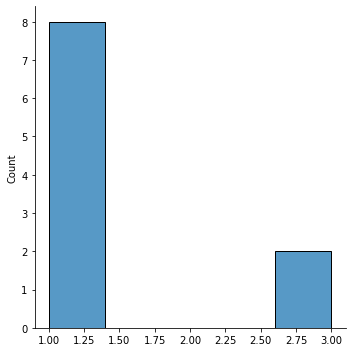

In [ ]:
sns.displot(y_predict)

In [ ]:
y_proba=gb_model.predict_proba(teste)
y_proba

array([[0.00717949, 0.02906138, 0.96375913],
       [0.98313377, 0.01089632, 0.0059699 ],
       [0.00718264, 0.02863556, 0.96418179],
       ...,
       [0.00718264, 0.02863556, 0.96418179],
       [0.00718264, 0.02863556, 0.96418179],
       [0.00718264, 0.02863556, 0.96418179]])

In [ ]:
rn_model = load_model('/content/drive/MyDrive/Projetos/Projeto_Analise_de_Oleo/modelos/4classesRN.hdf5')

In [ ]:
y_predict1 = rn_model.predict(teste)
y_predict1

ValueError: ignored

In [ ]:
#arquivo['TX_ALUMINIO']=0
#arquivo['TX_FERRO']=0
#arquivo['TX_CROMO']=0
#arquivo['TX_CHUMBO']=0
#arquivo['TX_COBRE']=0
#arquivo['TX_ESTANHO']=0
#arquivo['TX_PRATA']=0
#arquivo['TX_SILICIO']=0
#arquivo['TX_SODIO']=0
#arquivo['LIM_DIESEL']=0
#arquivo['LIM_VISCOSIDADE']=0
#arquivo['LIM_AGUA']=0
#arquivo['LIM_TBN']=0
#arquivo['LIM_FULIGEM']=0
#arquivo['LIM_OXIDACAO']=0
#arquivo['LIM_SULFATACAO']=0

In [ ]:
#arquivo = arquivo.iloc[101000:101020]

In [ ]:
#arquivo['TX_ALUMINIO'] = arquivo['TX_ALUMINIO'].astype(float)
#arquivo['TX_FERRO'] = arquivo['TX_FERRO'].astype(float)
#arquivo['TX_CROMO'] = arquivo['TX_CROMO'].astype(float)
#arquivo['TX_CHUMBO'] = arquivo['TX_CHUMBO'].astype(float)
#arquivo['TX_COBRE'] = arquivo['TX_COBRE'].astype(float)
#arquivo['TX_ESTANHO'] = arquivo['TX_ESTANHO'].astype(float)
#arquivo['TX_PRATA'] = arquivo['TX_PRATA'].astype(float)
#arquivo['TX_SILICIO'] = arquivo['TX_SILICIO'].astype(float)
#arquivo['TX_SODIO'] = arquivo['TX_SODIO'].astype(float)
#arquivo['LIM_DIESEL'] = arquivo['LIM_DIESEL'].astype(float)
#arquivo['LIM_VISCOSIDADE'] = arquivo['LIM_VISCOSIDADE'].astype(float)
#arquivo['LIM_AGUA'] = arquivo['LIM_AGUA'].astype(float)
#arquivo['LIM_TBN'] = arquivo['LIM_TBN'].astype(float)
#arquivo['LIM_FULIGEM'] = arquivo['LIM_FULIGEM'].astype(float)
#arquivo['LIM_OXIDACAO'] = arquivo['LIM_OXIDACAO'].astype(float)
#arquivo['LIM_SULFATACAO'] = arquivo['LIM_SULFATACAO'].astype(float)

In [ ]:
a=arquivo['LOCO_analise'].unique()
len(a)

80